In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
tf.__version__

'2.2.0-rc4'

In [0]:
mnist = keras.datasets.fashion_mnist

In [4]:
type(mnist)

module

In [5]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
np.max(X_train)

255

In [8]:
np.mean(X_train)

72.94035223214286

In [0]:
class_names = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

Data Exploration

In [10]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

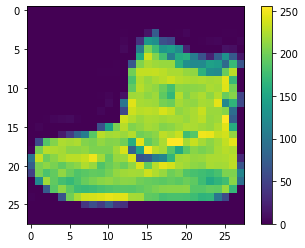

In [13]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

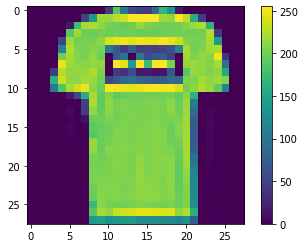

In [14]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

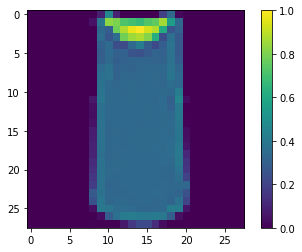

In [17]:
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()

Build the Model with TF 2.0

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [0]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model Compilation

  - Loss Function
  - Optimizer
  - Metrics

In [0]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [23]:
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4973 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3693 - accuracy: 0.8669
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3335 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3086 - accuracy: 0.8878
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2904 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2764 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2649 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2546 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2458 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [24]:
test_loss , test_acc = model.evaluate(X_test,y_test)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8813
0.8812999725341797


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred = model.predict_classes(X_test)

In [28]:
accuracy_score(y_test,y_pred)

0.8813

In [29]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
pred = model.predict(X_test)

In [31]:
pred

array([[2.4008480e-07, 1.2635897e-12, 5.6029520e-10, ..., 4.3746598e-02,
        7.3630673e-08, 9.5488179e-01],
       [8.6194872e-05, 9.1402823e-12, 9.9424237e-01, ..., 1.0746055e-16,
        1.6179559e-09, 9.5124785e-12],
       [6.6278211e-10, 1.0000000e+00, 4.0203060e-14, ..., 1.3098874e-27,
        1.3313570e-13, 7.5890299e-21],
       ...,
       [6.2294780e-06, 4.6521334e-10, 4.0493983e-06, ..., 3.7008814e-08,
        9.9998128e-01, 1.0098159e-11],
       [1.3287968e-07, 9.9999750e-01, 1.1530723e-09, ..., 2.1000294e-17,
        8.5181497e-09, 2.0360398e-13],
       [4.1841980e-07, 2.9224061e-09, 7.0466200e-08, ..., 1.2834019e-03,
        2.5874053e-05, 2.3246841e-06]], dtype=float32)

In [32]:
pred[0]

array([2.4008480e-07, 1.2635897e-12, 5.6029520e-10, 2.0509715e-10,
       2.3579392e-07, 1.3709326e-03, 2.7391298e-08, 4.3746598e-02,
       7.3630673e-08, 9.5488179e-01], dtype=float32)

In [33]:
np.argmax(pred[0])

9

In [34]:
np.argmax(pred[1])

2